In [219]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
TENTATIVES=8

In [220]:
'''# Read the eps_fraction_mean.csv which contains different combinations of eps and fraction
log = [l.split("\n")[0].split(",") for l in open(os.path.join('./log', 'eps_fraction_mean.csv')).readlines()]
log = log[1:]  # ignore the first line which is a string comment
log = np.array(log)
# Add dimensions to the array (which will contain the max_reward)
log = np.hstack((log, np.zeros((log.shape[0], 5), dtype=np.float32)))
'''
data=[]
for eps in [0.01, 0.04, 0.07, 0.1, 0.15, 0.2, 0.25]:
    for fraction in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]:
        for noise in [0,1]:
            data.append([eps,fraction,noise,0,0,0,0,0,0])

In [221]:
#order of labels in list 'log'
labels=["eps","fraction","noise","mean max reward","std max reward","noise","","steps to converge",""]

#In the order of labels, ex. possible_values[0] corresponds to values of eps
possible_values=[[0.01, 0.04, 0.07, 0.1, 0.15, 0.2, 0.25],[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35],[0,1]]


In [263]:
def filterdata(data,Filter):
    filtered_data=[]
    for row in data:
        b_append=True
        for k,v in Filter.items():
            b_append_sub=False
            for vv in v:
                if abs(row[k] - vv)<0.001:
                    b_append_sub=True
            if b_append_sub==False:
                b_append=False
        if b_append==True:
            filtered_data.append(row)
    return filtered_data

In [264]:
def plot(data,xlabel,ylabel,zlabel=None,Filter=None):
    
    plt.figure()
    plt.ylabel(labels[ylabel])
    plt.xlabel(labels[xlabel])
    
    if Filter == None:
        filtered_data=data
        plt.title(labels[ylabel]+' - '+labels[xlabel])
    else:
        filtered_data=filterdata(data,Filter)
        title=labels[ylabel]+' - '+labels[xlabel]+', '
        for k,v in Filter.items():
            title=title+labels[k]+'='+str(v)
        plt.title(title)
  
 

    
    if zlabel==None:
        dt={}
        x=[]
        y_mean=[]
        y_max=[]
        y_min=[]
        for i in range (0,len(filtered_data),1):
            y_value=filtered_data[i][ylabel]
            x_value=filtered_data[i][xlabel]
            if x_value in dt:
                dt[x_value].append(y_value)
            else:
                temp=[]
                temp.append(y_value)
                dt[x_value]=temp
        for k,v in dt.items():
            x.append(k)
            vnp=np.array(v).astype(np.float32)
            y_mean.append(np.median(vnp))
            y_max.append(np.max(vnp))
            y_min.append(np.min(vnp))
        xs, ymean_s = zip(*sorted(zip(x, y_mean)))
        xs, ymax_s = zip(*sorted(zip(x, y_max)))
        xs, ymin_s = zip(*sorted(zip(x, y_min)))
        plt.plot(xs, ymean_s)
        plt.fill_between(xs, ymin_s, ymax_s, alpha=0.3)

        
    else:
        iterating_items=possible_values[zlabel]
        for it in iterating_items:
            dt={}
            x=[]
            y_mean=[]
            y_max=[]
            y_min=[]
            for i in range (0,len(filtered_data),1):
                if abs(filtered_data[i][zlabel] - it)<0.001:
                    y_value=filtered_data[i][ylabel]
                    x_value=filtered_data[i][xlabel]
                    if x_value in dt:
                        dt[x_value].append(y_value)
                    else:
                        temp=[]
                        temp.append(y_value)
                        dt[x_value]=temp
            for k,v in dt.items():
                x.append(k)
                vnp=np.array(v).astype(np.float32)
                y_mean.append(np.median(vnp))
                y_max.append(np.max(vnp))
                y_min.append(np.min(vnp))
            xs, ymean_s = zip(*sorted(zip(x, y_mean)))
            xs, ymax_s = zip(*sorted(zip(x, y_max)))
            xs, ymin_s = zip(*sorted(zip(x, y_min)))

            plt.plot(xs, ymean_s, label=labels[zlabel]+'='+str(it))
            plt.fill_between(xs, ymin_s, ymax_s, alpha=0.1)

    plt.legend(loc='best')
    if zlabel==None:
        plt.savefig(os.path.join('./log', labels[xlabel]+'_'+labels[ylabel]+'.png'))
    else:
        plt.savefig(os.path.join('./log', labels[xlabel]+'_'+labels[ylabel]+'_'+labels[zlabel]+'.png'))

    plt.show()
    plt.close()
    
    

## Without noise

In [265]:
# For each row (eps,fraction), read the corresponding csv file and add the max reward to the log array
# TODO: replace max reward by mean max reward of different tentatives
for i in range (0,len(data),1):
    max_reward=[]
    step_to_max=[]
    for tentative in range(1,TENTATIVES+1,1):
        # Dir name is eps_fraction/tentative
        if data[i][2]==0:
            dir = str(data[i][0])+'_'+str(data[i][1])
        else :
            dir = str(data[i][0])+'_'+str(data[i][1])+'_noise'
        try:

            log2 = [l.split("\n")[0].split(",") for l in open(os.path.join('./log', dir, str(tentative),'progress.csv')).readlines()]
        except FileNotFoundError:
            print("not found")
        count = 0
        # Look for the index of mean 100 episodes reward
        for j in log2[0]:
            if j == 'mean 100 episode reward':
                index_reward = count
            if j == 'steps':
                index_steps = count
            count=count+1

        # Look for the max mean 100 episodes reward
        log2 = log2[1:]
        log2 = np.array(log2)
        mean_rew_100 = log2[:, index_reward].astype(np.float32)
        max_reward.append(np.max(mean_rew_100))
        step_to_max.append(log2[np.argmax(mean_rew_100),index_steps])
    max_reward=np.array(max_reward).astype(np.float32)
    step_to_max=np.array(step_to_max).astype(np.float32)
    data[i][3]=np.mean(max_reward)
    data[i][4]=np.std(max_reward)
    data[i][7]=np.median(step_to_max)


not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found


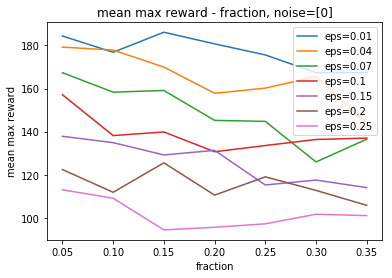

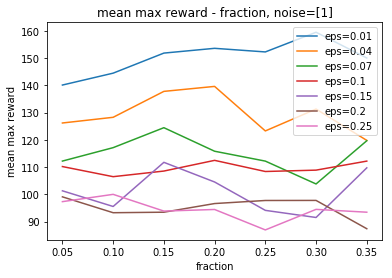

In [266]:
# For each eps, plot the evolution of reward according to fraction
plot(data,1,3,0,Filter={2:[0]})
plot(data,1,3,0,Filter={2:[1]})


No handles with labels found to put in legend.


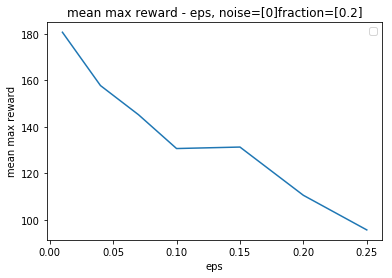

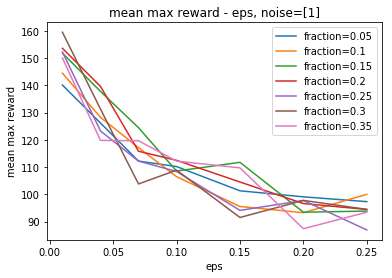

In [269]:
plot(data,0,3,Filter={2:[0],1:[0.2]})
plot(data,0,3,1,Filter={2:[1]})

ValueError: not enough values to unpack (expected 2, got 0)

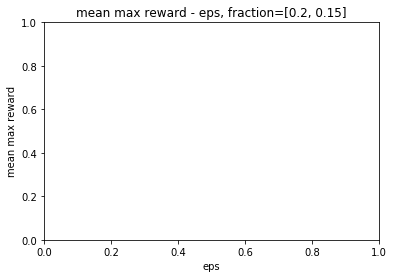

In [273]:

plot(data,0,3,2,Filter={1:[0.2,0.15]})
plot(data,1,3,2)

## With Noise

In [131]:
TENTATIVE_NOISE=4

In [132]:


# For each row (eps,fraction), read the corresponding csv file and add the max reward to the log array
# TODO: replace max reward by mean max reward of different tentatives


[['0.01' '0.1' '176.86249' '14.666284' '143.22499' '6.8162904' '79260.0'
  '0.0']
 ['0.1' '0.1' '138.175' '14.397894' '109.85' '10.533163' '81211.75' '0.0']
 ['0.1' '0.2' '130.675' '18.270792' '107.125' '10.888842' '62483.5' '0.0']
 ['0.01' '0.2' '180.7625' '15.099913' '147.75' '7.9064803' '91228.25'
  '0.0']
 ['0.1' '0.3' '136.3625' '22.150732' '106.45' '10.289923' '86342.75'
  '0.0']
 ['0.01' '0.3' '167.3625' '13.050661' '152.65' '11.645276' '78067.5'
  '0.0']
 ['0.1' '0.05' '157.1375' '17.330675' '111.975' '6.232728' '83588.5'
  '0.0']
 ['0.01' '0.05' '184.4' '7.0873127' '149.9' '13.976229' '87360.25' '0.0']
 ['0.1' '0.15' '139.84999' '22.765432' '102.875' '8.674494' '70360.5'
  '0.0']
 ['0.01' '0.15' '186.15' '9.80268' '153.54999' '6.868222' '80799.75'
  '0.0']
 ['0.1' '0.25' '133.5625' '11.082411' '104.15' '7.7387023' '80414.25'
  '0.0']
 ['0.01' '0.25' '175.6125' '16.938229' '151.2' '9.51078' '68278.5' '0.0']
 ['0.1' '0.35' '137.01251' '18.516714' '105.575' '10.243626' '86301.75'

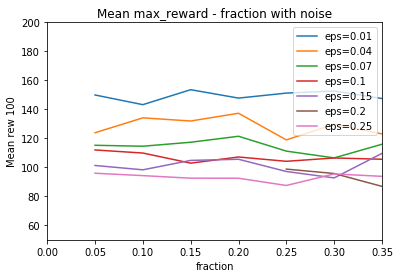

In [133]:


# For each eps, plot the evolution of reward according to fraction
plt.figure()
plt.ylabel('Mean rew 100')
plt.xlabel('fraction')
plt.title('Mean max_reward - fraction with noise')
plt.axis([0, 0.35, 50, 200])
# TODO: iterate the values contained in csv instead of manual inputs
for eps in (0.01, 0.04, 0.07, 0.1, 0.15, 0.2, 0.25):
    fraction=[]
    mean=[]
    for i in range (0,len(log),1):
        if abs(log[i][0].astype(np.float32) - eps)<0.001:
            fraction.append(log[i][1].astype(np.float32))
            mean.append(log[i][4].astype(np.float32))
    xs, ys = zip(*sorted(zip(fraction, mean)))
    plt.plot(xs, ys, label='eps='+str(eps))
plt.legend(loc='best')
plt.savefig(os.path.join('./log', 'mean_max_reward_eps_noise.png'))
plt.show()
plt.close()



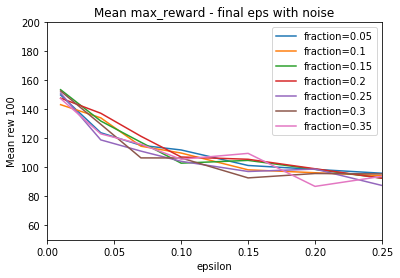

In [134]:

plt.figure()
plt.ylabel('Mean rew 100')
plt.xlabel('epsilon')
plt.title('Mean max_reward - final eps with noise')
plt.axis([0, 0.25, 50, 200])
# For each fraction, plot the evolution of reward according to eps
# TODO: iterate the values contained in csv instead of manual inputs
for fraction in (0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35):
    eps=[]
    mean=[]
    for i in range (0,len(log),1):
        if abs(log[i][1].astype(np.float32) - fraction)<0.001:
            eps.append(log[i][0].astype(np.float32))
            mean.append(log[i][4].astype(np.float32))

    xs, ys = zip(*sorted(zip(eps, mean)))
    plt.plot(xs, ys, label='fraction='+str(fraction))
plt.legend(loc='best')
plt.savefig(os.path.join('./log', 'mean_max_reward_fraction.png'))
plt.show()
plt.close()

## Comparaison of with/without noise

In [69]:
eps_to_analyse=0.1
fraction_to_analyse=0.2


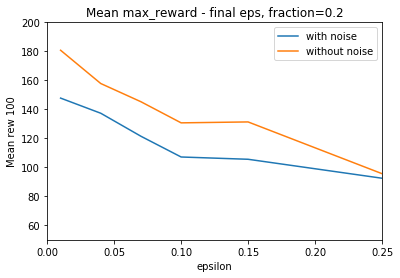

In [70]:
plt.figure()
plt.ylabel('Mean rew 100')
plt.xlabel('epsilon')
plt.title('Mean max_reward - final eps, fraction='+str(fraction_to_analyse))
plt.axis([0, 0.25, 50, 200])
# For each fraction, plot the evolution of reward according to eps
# TODO: iterate the values contained in csv instead of manual inputs
eps=[]
mean_with_noise=[]
mean_without_noise=[]
for i in range (0,len(log),1):
    if abs(log[i][1].astype(np.float32) - fraction_to_analyse)<0.001:
        eps.append(log[i][0].astype(np.float32))
        mean_with_noise.append(log[i][4].astype(np.float32))
        mean_without_noise.append(log[i][2].astype(np.float32))
xs, ys = zip(*sorted(zip(eps, mean_with_noise)))
xs_n, ys_n = zip(*sorted(zip(eps, mean_without_noise)))

plt.plot(xs, ys, label='with noise')
plt.plot(xs_n, ys_n, label='without noise')

plt.legend(loc='best')
plt.savefig(os.path.join('./log', 'comp_noise_fraction='+str(fraction_to_analyse)+'.png'))
plt.show()
plt.close()

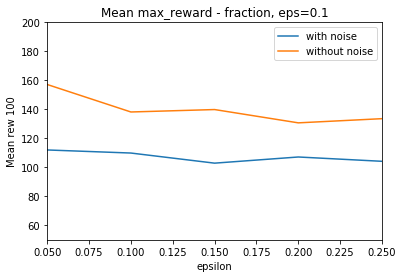

In [71]:
plt.figure()
plt.ylabel('Mean rew 100')
plt.xlabel('epsilon')
plt.title('Mean max_reward - fraction, eps='+str(eps_to_analyse))
plt.axis([0.05, 0.25, 50, 200])
# For each fraction, plot the evolution of reward according to eps
# TODO: iterate the values contained in csv instead of manual inputs
fraction=[]
mean_with_noise=[]
mean_without_noise=[]
for i in range (0,len(log),1):
    if abs(log[i][0].astype(np.float32) - eps_to_analyse)<0.001:
        fraction.append(log[i][1].astype(np.float32))
        mean_with_noise.append(log[i][4].astype(np.float32))
        mean_without_noise.append(log[i][2].astype(np.float32))
xs, ys = zip(*sorted(zip(fraction, mean_with_noise)))
xs_n, ys_n = zip(*sorted(zip(fraction, mean_without_noise)))

plt.plot(xs, ys, label='with noise')
plt.plot(xs_n, ys_n, label='without noise')

plt.legend(loc='best')
plt.savefig(os.path.join('./log', 'comp_noise_eps='+str(eps_to_analyse)+'.png'))
plt.show()
plt.close()

In [78]:
tentative_to_analyse=3

In [79]:

filename='./log'
filename+='/'+str(eps_to_analyse)+'_'+str(fraction_to_analyse)
filename+='/'+str(tentative_to_analyse)
filename+='/progress.csv'
without_noise = [l.split("\n")[0].split(",") for l in open(filename).readlines()]
count=0
for i in without_noise[0]:
    if i == 'mean 100 episode reward':
        index_mean=count
    elif i=="steps":
        index_steps=count
    count=count+1
# print('index mean = ' + str(index_mean))
# print('index steps = ' + str(index_steps))
without_noise = without_noise[1:]  # ignore the first line which is a string comment
# colum order q_max,q_min,episodes,mean 100 episode reward,steps,% time spent exploring
without_noise = np.array(without_noise)
# print(len(log))
steps = without_noise[:, index_steps].astype(np.float32)
mean_rew_100 = without_noise[:, index_mean].astype(np.float32)


In [80]:
filename='./log'
filename+='/'+str(eps_to_analyse)+'_'+str(fraction_to_analyse)+'_noise'
filename+='/'+str(tentative_to_analyse)
filename+='/progress.csv'
with_noise = [l.split("\n")[0].split(",") for l in open(filename).readlines()]
count=0
for i in with_noise[0]:
    if i == 'mean 100 episode reward':
        index_mean=count
    elif i=="steps":
        index_steps=count
    count=count+1
# print('index mean = ' + str(index_mean))
# print('index steps = ' + str(index_steps))
with_noise = with_noise[1:]  # ignore the first line which is a string comment
# colum order q_max,q_min,episodes,mean 100 episode reward,steps,% time spent exploring
with_noise = np.array(with_noise)
# print(len(log))
steps_noise = with_noise[:, index_steps].astype(np.float32)
mean_rew_100_noise = with_noise[:, index_mean].astype(np.float32)


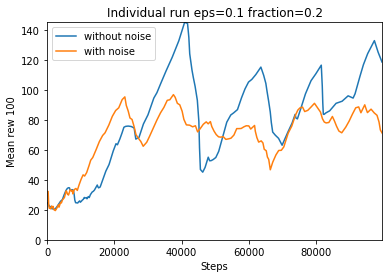

In [81]:
plt.figure()
plt.ylabel('Mean rew 100')
plt.xlabel('Steps')
plt.title('Individual run eps='+str(eps_to_analyse)+' fraction='+str(fraction_to_analyse))
plt.axis([0, np.max(steps), 0, np.max(mean_rew_100)])
plt.plot(steps, mean_rew_100,label='without noise')
plt.plot(steps_noise,mean_rew_100_noise,label='with noise')
plt.legend()
plt.show()
# plt.savefig(os.path.join(root, d, str(tentative),'Evolution mean reward - steps.png'))
plt.close()